<a href="https://colab.research.google.com/github/anthonyrueckert/newrepo/blob/main/TD_Regression.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
%%capture
%pip install nfl_data_py --upgrade

In [ ]:
import pandas as pd
import nfl_data_py as nfl
import numpy as np

seasons = np.arange(2008,2021).tolist()
df = nfl.import_pbp_data(seasons)

2008 done.
2009 done.
2010 done.
2011 done.
2012 done.
2013 done.
2014 done.
2015 done.
2016 done.
2017 done.
2018 done.
2019 done.
2020 done.
Downcasting floats.


/usr/local/lib/python3.8/dist-packages/nfl_data_py/__init__.py:137: FutureWarning: In a future version, `df.iloc[:, i] = newvals` will attempt to set the values inplace instead of always setting a new array. To retain the old behavior, use either `df[df.columns[i]] = newvals` or, if columns are non-unique, `df.isetitem(i, newvals)`
  plays.loc[:, cols] = plays.loc[:, cols].astype(numpy.float32)


In [ ]:
for col in df.columns:
  if 'rush' in col:
    print(col)
  elif 'distance' in col:
    print(col)
  elif 'yardline' in col:
    print(col)

yardline_100
kick_distance
total_home_rush_epa
total_away_rush_epa
total_home_rush_wpa
total_away_rush_wpa
first_down_rush
rush_attempt
rush_touchdown
lateral_rush
rusher_player_id
rusher_player_name
rushing_yards
lateral_rusher_player_id
lateral_rusher_player_name
lateral_rushing_yards
rusher
rusher_jersey_number
rush
rusher_id
number_of_pass_rushers


In [ ]:
rush_df = df[['rush_attempt','rush_touchdown','yardline_100','two_point_attempt']]
rush_df = rush_df.loc[(rush_df['two_point_attempt']==0) & (rush_df['rush_attempt']==1)]
rush_df = rush_df[['rush_attempt','rush_touchdown','yardline_100']]

print(rush_df.shape)

(186295, 3)


In [ ]:
rush_df_prob = rush_df.groupby('yardline_100')['rush_touchdown'].value_counts(normalize = True)

rush_df_prob = pd.DataFrame({
    'td_probability': rush_df_prob.values
}, index = rush_df_prob.index).reset_index()

rush_df_prob = rush_df_prob.loc[rush_df_prob['rush_touchdown'] == 1]
rush_df_prob = rush_df_prob.drop('rush_touchdown', axis = 1)

rush_df_prob.head(15)

,yardline_100,td_probability
0,1.0,0.553149
3,2.0,0.410326
5,3.0,0.334902
7,4.0,0.275020
9,5.0,0.203994
11,6.0,0.156274
13,7.0,0.148734
15,8.0,0.129513
17,9.0,0.082886
19,10.0,0.092075


In [ ]:
%matplotlib inline
import seaborn as sns; sns.set_style('whitegrid');


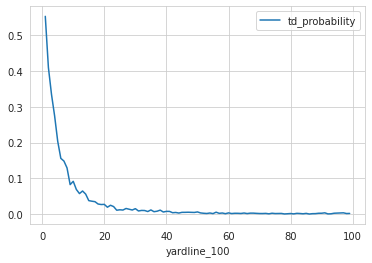

In [ ]:
rush_df_prob.plot(x = 'yardline_100', y = 'td_probability');

In [ ]:
pbp_2021 = nfl.import_pbp_data([2021])

2021 done.
Downcasting floats.


/usr/local/lib/python3.8/dist-packages/nfl_data_py/__init__.py:137: FutureWarning: In a future version, `df.iloc[:, i] = newvals` will attempt to set the values inplace instead of always setting a new array. To retain the old behavior, use either `df[df.columns[i]] = newvals` or, if columns are non-unique, `df.isetitem(i, newvals)`
  plays.loc[:, cols] = plays.loc[:, cols].astype(numpy.float32)


In [ ]:
pbp_2021 = pbp_2021[['rusher_player_name', 'rusher_player_id', 'posteam', 'yardline_100']].dropna()


In [ ]:
df = pbp_2021.merge(rush_df_prob, how = 'left', on = 'yardline_100')
df.head()

,rusher_player_name,rusher_player_id,posteam,yardline_100,td_probability
0,D.Henry,00-0032764,TEN,75.0,0.002036
1,K.Murray,00-0035228,ARI,23.0,0.021491
2,C.Edmonds,00-0034681,ARI,9.0,0.082886
3,D.Henry,00-0032764,TEN,80.0,0.002077
4,D.Henry,00-0032764,TEN,75.0,0.002036


In [ ]:
df = df.groupby(['rusher_player_name','rusher_player_id','posteam'], as_index = False).agg({
    'td_probability': np.sum
}).rename({'td_probability': 'Expected Touchdowns'}, axis = 1)


In [ ]:
df = df.sort_values(by = 'Expected Touchdowns', ascending = False)
df.head(15)

,rusher_player_name,rusher_player_id,posteam,Expected Touchdowns
216,J.Taylor,00-0036223,IND,16.311579
202,J.Mixon,00-0033897,CIN,12.518435
169,J.Conner,00-0033553,ARI,11.647356
137,E.Elliott,00-0033045,DAL,9.876702
102,D.Harris,00-0035657,NE,9.789782
91,D.Cook,00-0033893,MIN,9.578937
10,A.Ekeler,00-0033699,LAC,9.514625
11,A.Gibson,00-0036328,WAS,9.101679
251,L.Fournette,00-0033856,TB,8.848864
104,D.Henry,00-0032764,TEN,8.711209


In [ ]:
df = df.rename(columns = {
    'rusher_player_name':'Player',
    'posteam': 'Team',
    'rusher_player_id':'ID'
    })

df['Expected Touchdown Rank'] = df['Expected Touchdowns'].rank(ascending = False)
df.head(15)

,Player,ID,Team,Expected Touchdowns,Expected Touchdown Rank
216,J.Taylor,00-0036223,IND,16.311579,1.0
202,J.Mixon,00-0033897,CIN,12.518435,2.0
169,J.Conner,00-0033553,ARI,11.647356,3.0
137,E.Elliott,00-0033045,DAL,9.876702,4.0
102,D.Harris,00-0035657,NE,9.789782,5.0
91,D.Cook,00-0033893,MIN,9.578937,6.0
10,A.Ekeler,00-0033699,LAC,9.514625,7.0
11,A.Gibson,00-0036328,WAS,9.101679,8.0
251,L.Fournette,00-0033856,TB,8.848864,9.0
104,D.Henry,00-0032764,TEN,8.711209,10.0


In [ ]:
roster = nfl.import_rosters([2021])
roster = roster[['player_id', 'position']].rename(columns = {'player_id':'ID'})

df = df.merge(roster, how = 'inner', on = 'ID')
df = df.loc[df['position'] == 'RB'].drop('position', axis = 1)

In [ ]:
pbp_2021_actual = nfl.import_pbp_data([2021])
pbp_2021_actual = pbp_2021_actual[['td_team', 'td_player_name','rusher_player_id']].rename(columns = {
    "td_player_name":'Player',
    "td_team":'Team',
    'rusher_player_id':'ID'
})

pbp_2021_actual.head()

2021 done.
Downcasting floats.


/usr/local/lib/python3.8/dist-packages/nfl_data_py/__init__.py:137: FutureWarning: In a future version, `df.iloc[:, i] = newvals` will attempt to set the values inplace instead of always setting a new array. To retain the old behavior, use either `df[df.columns[i]] = newvals` or, if columns are non-unique, `df.isetitem(i, newvals)`
  plays.loc[:, cols] = plays.loc[:, cols].astype(numpy.float32)


,Team,Player,ID
0,None,None,None
1,None,None,None
2,None,None,00-0032764
3,None,None,None
4,None,None,None


In [ ]:
pbp_2021_actual = pbp_2021_actual.dropna()
pbp_2021_actual.head()

,Team,Player,ID
67,TEN,R.Tannehill,00-0029701
82,ARI,K.Murray,00-0035228
214,BAL,T.Williams,00-0036457
250,LV,J.Jacobs,00-0035700
327,LV,J.Jacobs,00-0035700


In [ ]:
pbp_2021_actual = pbp_2021_actual = pbp_2021_actual.merge(roster, how = 'inner', on = 'ID')
pbp_2021_actual = pbp_2021_actual[pbp_2021_actual['position'] == 'RB']
pbp_2021_actual = pbp_2021_actual.groupby(['ID','position']).count().reset_index()
pbp_2021_actual = pbp_2021_actual.rename(columns = {'Team':'Actual Touchdowns'}).drop('Player', axis = 1)

pbp_2021_actual.head(20)

,ID,position,Actual Touchdowns
0,00-0025394,RB,2
1,00-0027966,RB,2
2,00-0029239,RB,1
3,00-0029892,RB,1
4,00-0030288,RB,3
5,00-0030456,RB,1
6,00-0030496,RB,2
7,00-0030513,RB,6
8,00-0030578,RB,6
9,00-0030874,RB,2


In [ ]:
regression_df = df.merge(pbp_2021_actual, on = 'ID', how = 'left').drop(['ID','position'], axis = 1)

regression_df = regression_df.fillna(0)

regression_df.head(20)

,Player,Team,Expected Touchdowns,Expected Touchdown Rank,Actual Touchdowns
0,J.Taylor,IND,16.311579,1.0,18.0
1,J.Mixon,CIN,12.518435,2.0,15.0
2,J.Conner,ARI,11.647356,3.0,16.0
3,E.Elliott,DAL,9.876702,4.0,10.0
4,D.Harris,NE,9.789782,5.0,15.0
5,D.Cook,MIN,9.578937,6.0,6.0
6,A.Ekeler,LAC,9.514625,7.0,12.0
7,A.Gibson,WAS,9.101679,8.0,7.0
8,L.Fournette,TB,8.848864,9.0,10.0
9,D.Henry,TEN,8.711209,10.0,11.0


In [ ]:
regression_df['Regression Candidate'] = regression_df['Expected Touchdowns'] - regression_df['Actual Touchdowns']
regression_df['Regression Candidate Rank'] = regression_df['Actual Touchdowns'].rank(ascending = False) - regression_df['Expected Touchdown Rank']

regression_df.head(20)

,Player,Team,Expected Touchdowns,Expected Touchdown Rank,Actual Touchdowns,Regression Candidate,Regression Candidate Rank
0,J.Taylor,IND,16.311579,1.0,18.0,-1.688421,0.0
1,J.Mixon,CIN,12.518435,2.0,15.0,-2.481565,1.5
2,J.Conner,ARI,11.647356,3.0,16.0,-4.352644,-1.0
3,E.Elliott,DAL,9.876702,4.0,10.0,-0.123298,5.0
4,D.Harris,NE,9.789782,5.0,15.0,-5.210218,-1.5
5,D.Cook,MIN,9.578937,6.0,6.0,3.578937,15.0
6,A.Ekeler,LAC,9.514625,7.0,12.0,-2.485375,-2.0
7,A.Gibson,WAS,9.101679,8.0,7.0,2.101679,8.0
8,L.Fournette,TB,8.848864,9.0,10.0,-1.151136,0.0
9,D.Henry,TEN,8.711209,10.0,11.0,-2.288791,-4.0


In [ ]:
regression_df.sort_values(by = 'Regression Candidate').head(20)

,Player,Team,Expected Touchdowns,Expected Touchdown Rank,Actual Touchdowns,Regression Candidate,Regression Candidate Rank
4,D.Harris,NE,9.789782,5.0,15.0,-5.210218,-1.5
2,J.Conner,ARI,11.647356,3.0,16.0,-4.352644,-1.0
26,M.Carter,NYJ,0.670603,141.0,4.0,-3.329397,-105.0
52,R.Penny,SEA,3.096180,60.0,6.0,-2.903820,-39.0
17,M.Gordon,DEN,7.420062,19.0,10.0,-2.579938,-10.0
6,A.Ekeler,LAC,9.514625,7.0,12.0,-2.485375,-2.0
1,J.Mixon,CIN,12.518435,2.0,15.0,-2.481565,1.5
15,D.Singletary,BUF,7.703336,17.0,10.0,-2.296664,-8.0
9,D.Henry,TEN,8.711209,10.0,11.0,-2.288791,-4.0
56,K.Gainwell,PHI,2.720797,66.0,5.0,-2.279203,-38.0


/usr/local/lib/python3.8/dist-packages/seaborn/_decorators.py:36: FutureWarning: Pass the following variables as keyword args: x, y. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


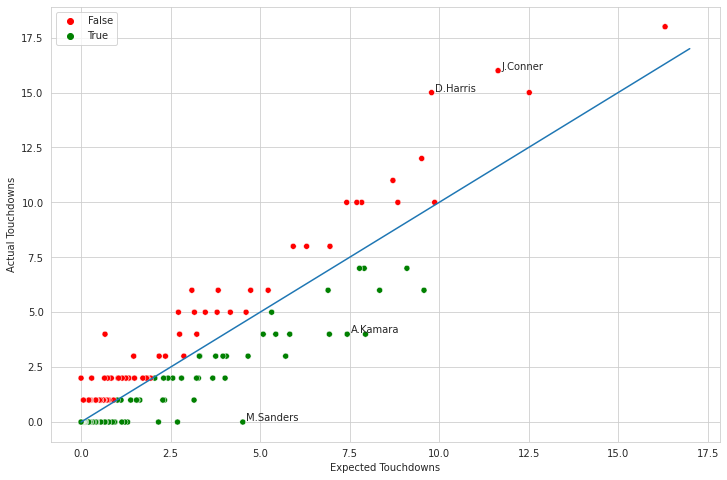

In [ ]:
from matplotlib import pyplot as plt; sns.set_style('whitegrid');

# using the object-oriented API for greater control over our plots. Setting figsize on the same line.
fig, ax = plt.subplots(figsize=(12, 8))

# creating a new column with either True/False based on if Regression Candidate is a positive number
regression_df['Positive Regression Candidate'] = regression_df['Regression Candidate'] > 0

# simple scatter plot
sns.scatterplot(
    x = 'Expected Touchdowns',
    y = 'Actual Touchdowns',
    hue = 'Positive Regression Candidate',
    data = regression_df,
    palette = ['r', 'g'] # red and green
);

max_act_touchdowns = int(regression_df['Actual Touchdowns'].max()) # max touchdowns
max_exp_touchdowns = int(regression_df['Expected Touchdowns'].max()) # max expected touchdowns

max_tds = max(max_act_touchdowns, max_exp_touchdowns) # max of actual and expected tds

sns.lineplot(range(max_tds), range(max_tds)) # plotting a line with slope of 1 up to max_tds number. This is the blue line on our viz

# initialize a list of notable players we'd like to annotate the visualization with.
notable_players = ['D.Harris', 'J.Conner', 'M.Sanders', 'A.Kamara']

for _, row in regression_df.iterrows():
    if row['Player'] in notable_players: 
        ax.text(
            x = row['Expected Touchdowns']+.1, # add a bit of spacing from the point in the x-direction
            y = row['Actual Touchdowns'] + 0.05, # same but in the y-direction
            s = row['Player'] # annotate with the player's name
        )